In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
device_client = pd.read_csv('device_client.csv', sep=';')
payment_client = pd.read_csv('payment_client.csv', sep=';')

In [3]:
payment_client_df = payment_client.merge(device_client, on='id_client')
payment_amt = payment_client['amt_pay']

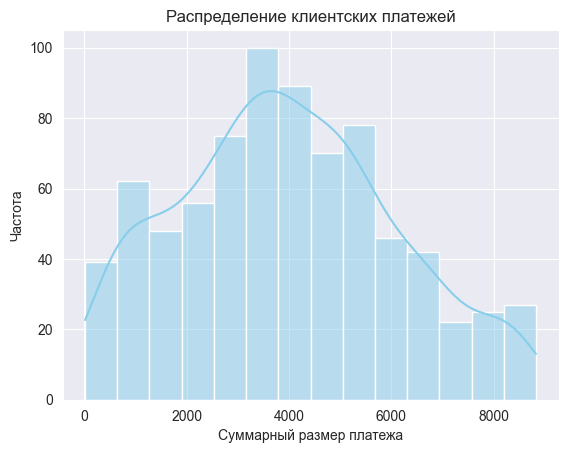

In [4]:
sns.histplot(payment_amt, color='skyblue', edgecolor='white', kde=True)
plt.title('Распределение клиентских платежей')
plt.xlabel('Суммарный размер платежа')
plt.ylabel('Частота')
plt.show()

In [5]:
def f_std(payment_amt):
    mean = np.mean(payment_amt)
    std = np.std(payment_amt)
    df_len = len(payment_amt)

    return mean, std, df_len

f_std(payment_amt)

(3961.2182284980745, 2123.291196621356, 779)

In [6]:
def f_sigma(payment_amt):
    s_mean, s_std, s_df_len = f_std(payment_amt)
    lower_bound = s_mean - s_std
    upper_bound = s_mean + s_std

    df_one_sigma = payment_client[
    (payment_client_df['amt_pay'] >= lower_bound) & (payment_client_df['amt_pay'] <= upper_bound)
    ]

    return df_one_sigma.count()['id_client'] / payment_client_df.count()['id_client']

f_sigma(payment_amt)

0.6469833119383825

In [7]:
def s_sigma(payment_amt):
    s_mean, s_std, s_df_len = f_std(payment_amt)
    lower_bound = s_mean - 2 * s_std
    upper_bound = s_mean + 2 * s_std

    df_two_sigma = payment_client[
    (payment_client_df['amt_pay'] >= lower_bound) & (payment_client_df['amt_pay'] <= upper_bound)
    ]

    return df_two_sigma.count()['id_client'] / payment_client_df.count()['id_client']

s_sigma(payment_amt)

0.9653401797175867

In [8]:
def t_sigma(payment_amt):
    s_mean, s_std, s_df_len = f_std(payment_amt)
    lower_bound = s_mean - 3 * s_std
    upper_bound = s_mean + 3 * s_std

    df_three_sigma = payment_client_df[
        (payment_client_df['amt_pay'] >= lower_bound) & (payment_client_df['amt_pay'] <= upper_bound)
    ]

    return df_three_sigma.count()['id_client'] / payment_client_df.count()['id_client']

t_sigma(payment_amt)

1.0

In [9]:
unique_device_types = device_client['type'].unique()

df_res = pd.DataFrame(index=unique_device_types, columns=[
    'Процент выборки внутри среднее плюс-минус одна сигма (1sigma)',
    'Процент выборки внутри среднее плюс-минус две сигмы (2sigma)',
    'Процент выборки внутри среднее плюс-минус три сигмы (3sigma)',
    'Разница по сравнению с соответствующим показателем нормального распределения - 68% (diff1sigma)',
    'Разница по сравнению с соответствующим показателем нормального распределения - 95% (diff2sigma)',
    'Разница по сравнению с соответствующим показателем нормального распределения - 99.7% (diff3sigma)'
])

for device_type in unique_device_types:
    device_type_data = device_client[device_client['type'] == device_type]
    payment_amt = payment_client_df[payment_client_df['type'] == device_type]['amt_pay']

    df_res.loc[device_type] = [
        f_sigma(payment_amt),
        s_sigma(payment_amt),
        t_sigma(payment_amt),
        abs(f_sigma(payment_amt) - 0.68),
        abs(s_sigma(payment_amt) - 0.95),
        abs(t_sigma(payment_amt) - 0.997)
    ]

print(df_res)

        Процент выборки внутри среднее плюс-минус одна сигма (1sigma)  \
ios                                                 0.6457              
PC                                                0.525032              
android                                           0.661104              

        Процент выборки внутри среднее плюс-минус две сигмы (2sigma)  \
ios                                               0.985879             
PC                                                 0.87163             
android                                           0.980745             

        Процент выборки внутри среднее плюс-минус три сигмы (3sigma)  \
ios                                                    1.0             
PC                                                0.967908             
android                                                1.0             

        Разница по сравнению с соответствующим показателем нормального распределения - 68% (diff1sigma)  \
ios                   